<a href="https://colab.research.google.com/github/ShibuGitB/task/blob/main/message_spam_or_not_nlp_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

X=pd.read_csv("/content/drive/MyDrive/data sets/SMS_train.csv",encoding="ISO-8859-1")
X

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [2]:
Y=pd.read_csv("/content/drive/MyDrive/data sets/SMS_test.csv",encoding="ISO-8859-1")
Y

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [3]:
X=pd.concat([X,Y],axis=0)
X.reset_index(drop=True)

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [4]:
X.drop(["S. No."],axis=1,inplace=True)
X

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [5]:
print (X.isna().sum())

Message_body    0
Label           0
dtype: int64


In [6]:
print (X.dtypes)

Message_body    object
Label           object
dtype: object


In [7]:
X["Label"].unique()

array(['Non-Spam', 'Spam'], dtype=object)

In [8]:
X["Label"]=X["Label"].map({"Spam":1,"Non-Spam":0})

In [9]:
x=X["Message_body"]
x

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [10]:
x=x.str.replace("[^a-zA-Z0-9 ]","")
x

<ipython-input-10-c64728722ca1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x=x.str.replace("[^a-zA-Z0-9 ]","")


0                              Rofl Its true to its name
1      The guy did some bitching but I acted like id ...
2      Pity  was in mood for that Soany other suggest...
3                     Will  b going to esplanade fr home
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear You read something fo...
122    Sun ah Thk mayb can if dun have anythin on Thk...
123    SYMPTOMS when U are in love 1U like listening ...
124      Great Have a safe trip Dont panic surrender all
Name: Message_body, Length: 1082, dtype: object

In [11]:
from nltk import TweetTokenizer
y=TweetTokenizer()

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
z=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
from nltk.stem import SnowballStemmer
w=SnowballStemmer("english")

In [14]:
x=x.apply(lambda i:[w.stem(j.lower()) for j in y.tokenize(i) if j not in z]).apply(lambda j:" ".join(j))
x

0                                      rofl it true name
1      the guy bitch i act like id interest buy somet...
2                                piti mood soani suggest
3                             will b go esplanad fr home
4      this 2nd time tri 2 contact u u 750 pound priz...
                             ...                        
120    7 wonder my world 7th you 6th ur style 5th ur ...
121                 tri someth dear you read someth exam
122    sun ah thk mayb dun anythin thk book e lesson ...
123    symptom u love 1u like listen song 2u get stop...
124              great have safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
q=TfidfVectorizer()
q.fit(x)
x=q.transform(x)
print (x)

  (0, 2925)	0.5138227862095585
  (0, 2424)	0.6203674563946521
  (0, 1985)	0.46798234723932247
  (0, 1597)	0.36348711956636104
  (1, 3083)	0.20626381057914522
  (1, 2990)	0.2456955070509607
  (1, 2820)	0.21501541831964258
  (1, 2622)	0.24890630940793723
  (1, 2011)	0.23987064274625747
  (1, 1746)	0.1966838315670794
  (1, 1576)	0.2968229184752863
  (1, 1525)	0.26456511338459
  (1, 1387)	0.24269200203198943
  (1, 1309)	0.2968229184752863
  (1, 1261)	0.17890929164998226
  (1, 1105)	0.27494980712268574
  (1, 733)	0.24890630940793723
  (1, 658)	0.3394654173040783
  (1, 435)	0.320595810970449
  (2, 2731)	0.4787188201047524
  (2, 2612)	0.5068952197043992
  (2, 2199)	0.5068952197043992
  (2, 1937)	0.5068952197043992
  (3, 3119)	0.44115303616517487
  (3, 1480)	0.34850372933528095
  :	:
  (1079, 678)	0.231014119708867
  (1079, 521)	0.2910222671088449
  (1079, 466)	0.231014119708867
  (1080, 3146)	0.24036112651605246
  (1080, 2764)	0.3084091060707579
  (1080, 2698)	0.18620249171969352
  (1080, 262

In [16]:
import numpy as np

x=x.toarray()
y=np.array(X["Label"])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
l=KNeighborsClassifier(n_neighbors=5,algorithm="auto",weights="distance")
l.fit(x_train,y_train)
o=l.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test,o))

0.8953846153846153


In [20]:
from sklearn.model_selection import GridSearchCV
params={"n_neighbors":[1,2,3,4,5],"weights":["uniform","distance"],"algorithm":["auto","ball_tree","kd_tree","brute"]}
i=GridSearchCV(l,params,cv=5,scoring="accuracy")
i.fit(x_train,y_train)
print (i.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [21]:
from sklearn.metrics import classification_report
print (classification_report(y_test,o))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       260
           1       0.97      0.49      0.65        65

    accuracy                           0.90       325
   macro avg       0.93      0.74      0.80       325
weighted avg       0.90      0.90      0.88       325



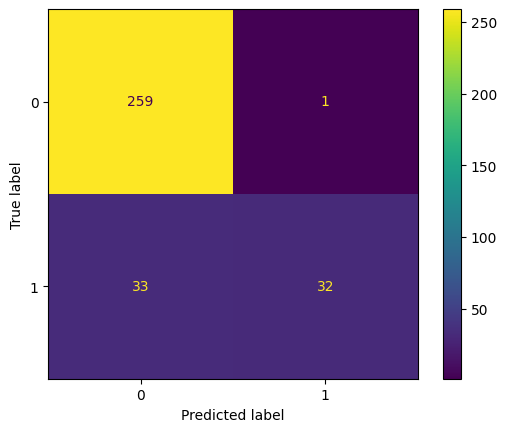

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
print (ConfusionMatrixDisplay.from_predictions(y_test,o))

In [23]:
u=l.predict(q.transform(["hii guys"]))

if u==0 :

  print ("non spam")

else :

  print ("spam")

non spam
